In [13]:
import pandas as pd

In [14]:

df = pd.read_csv('recons-sab-bma.csv')


In [15]:
df


,Refs,Reads
0,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...
1,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...
2,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...
3,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...,GCCCAAGGGTACGCCCGCAGCGACGCAAGTCGGAGGAGCAAGCGCG...
4,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...,GCACTGATGTAACTCATGGTACATCCGTCGAGCGCCATTTTGTTAC...
...,...,...
9995,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...
9996,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...
9997,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...
9998,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...


In [16]:
from tqdm import tqdm


In [17]:
noisy_strands = [s.strip() for s in list(df['Reads'])]


In [18]:
ref_strands = [s.strip() for s in list(df['Refs'])]


In [19]:
import difflib


In [20]:
def print_diff(ref_strand, recons_strand):
    global pairs
    global pairs_no_pos
    a, b = 0, 0

    # quadratic time, no heuristics
    for match in difflib.SequenceMatcher(None, ref_strand, recons_strand, autojunk=False).get_matching_blocks():
        was = ref_strand[a:match.a]
        now = recons_strand[b:match.b]
        
        a = match.a + match.size
        b = match.b + match.size
        
        if was == '' and now == '':
            pass
        else:
            # print('{}|{}'.format(was, now), end=', ')
            pairs += [(was, now, match.a)]
            pairs_no_pos += [(was, now)]


            
        
    #print('')


In [21]:
# AGCT
# TAGC

# SM: (0, _ -> T), (4, _ -> T)
# Prof: (0, 1, 2, 3)

count_pos = [0] * 5
def print_diff2(ref_strand, recons_strand):
    for i, (c1, c2) in enumerate(zip(ref_strand, recons_strand)):
        if c1 != c2:
            count_pos[i] += 1
print_diff2("AGCT", "TAGC")
print(count_pos)

ref_strand = "AGCT"
recons_strand = "TAGC"
a = 0
b = 0
for match in difflib.SequenceMatcher(None, ref_strand, recons_strand, autojunk=False).get_matching_blocks():
    was = ref_strand[a:match.a]
    now = recons_strand[b:match.b]

    a = match.a + match.size
    b = match.b + match.size

    print(match, was, now, match.a)


    if was == '' and now == '':
        pass
    else:
        pass
        # print('{}|{}'.format(was, now), end=', ')
        # pairs += [(was, now, match.a)]
        # pairs_no_pos += [(was, now)]


[1, 1, 1, 1, 0]
Match(a=0, b=1, size=3)  T 0
Match(a=4, b=4, size=0) T  4


100%|██████████| 10000/10000 [00:00<00:00, 202715.44it/s]

[11, 41, 49, 52, 59, 66, 81, 90, 93, 102, 116, 130, 133, 151, 165, 173, 188, 196, 190, 221, 249, 259, 281, 277, 314, 338, 333, 352, 359, 391, 398, 400, 405, 450, 454, 496, 482, 510, 537, 556, 574, 571, 598, 605, 640, 647, 652, 698, 696, 725, 754, 755, 765, 813, 807, 1466, 1430, 1431, 1403, 1394, 1380, 1371, 1360, 1340, 1335, 1310, 1254, 1302, 1277, 1247, 1259, 1203, 1199, 1186, 1197, 1173, 1127, 1123, 1141, 1092, 1117, 1077, 1074, 1058, 1041, 1028, 996, 995, 1005, 952, 964, 944, 946, 920, 916, 912, 896, 876, 879, 838, 833, 853, 895, 837, 821, 840, 863, 852, 782, 570, 0]


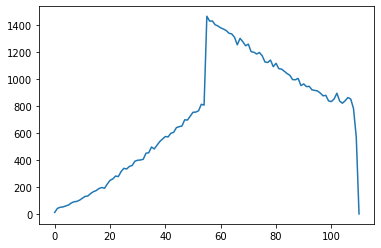

In [22]:
strand_len = 110
count_pos = [0] * (strand_len + 1)

def print_diff2(ref_strand, recons_strand):
    for i, (c1, c2) in enumerate(zip(ref_strand, recons_strand)):
        if c1 != c2:
            count_pos[i] += 1

for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        #print(i, end=': ')
        print_diff2(ref_strands[i], noisy_strands[i])

import matplotlib.pyplot as plt
plt.plot(range(strand_len + 1), count_pos)
print(count_pos)


In [23]:
import numpy as np


In [24]:
pairs = []
pairs_no_pos = []
for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        #print(i, end=': ')
        print_diff(ref_strands[i], noisy_strands[i])

100%|██████████| 10000/10000 [00:03<00:00, 2850.27it/s]


In [25]:
subs_no_pos, counts_no_pos = np.unique(pairs_no_pos, return_counts=True, axis=0)
sorting = np.argsort(counts_no_pos)
subs_no_pos = subs_no_pos[sorting]
counts_no_pos = counts_no_pos[sorting]

In [26]:
for sub, count in zip(subs_no_pos, counts_no_pos):
    if count > 5:
        print("{} -> {}".format(sub[0], sub[1]), count)

 -> GAA 6
G -> AC 6
C -> AA 6
CT -> AG 6
T -> CC 6
TT -> A 6
 -> CCC 6
GTT ->  6
TTG ->  6
CC -> A 7
T -> CA 7
 -> ACA 7
TGT ->  8
CA ->  8
G -> AA 8
T -> AC 8
G -> CA 8
GG ->  9
CT -> A 9
T -> GG 10
TC -> A 11
TG -> A 11
T -> AA 12
GT -> A 12
TG -> C 14
CC ->  15
 -> GT 16
AC ->  16
GA ->  17
TA ->  18
 -> TG 19
AG ->  20
 -> CT 21
 -> CG 22
 -> TT 22
 -> GA 22
A -> G 23
 -> AT 24
TT ->  24
 -> GG 25
A -> T 25
G -> T 26
 -> TC 27
 -> AC 27
CG ->  28
 -> AG 28
 -> GC 28
AT ->  29
GC ->  30
 -> TA 31
CT ->  32
 -> CA 32
C -> T 33
 -> CC 35
C -> G 37
A -> C 38
TC ->  39
TG ->  43
 -> AA 44
GT ->  62
G -> C 217
G -> A 221
T -> G 223
C -> A 254
T -> A 282
T -> C 289
A ->  359
 -> T 467
 -> G 575
C ->  606
 -> C 729
G ->  756
 -> A 842
T ->  1089


In [27]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]


In [28]:
for sub, count in zip(subs, counts):
    if count > 5:
        print("{} -> {} @ {}".format(sub[0], sub[1], sub[2]), count)


G ->  @ 67 6
C ->  @ 39 6
 -> A @ 76 6
G ->  @ 78 6
T ->  @ 9 6
T ->  @ 62 6
C -> A @ 52 6
C -> A @ 55 6
C ->  @ 25 6
T -> C @ 70 6
G ->  @ 79 6
T ->  @ 74 6
 -> CT @ 54 6
 -> A @ 92 6
C ->  @ 108 6
 -> C @ 59 6
 -> A @ 94 6
C -> A @ 65 6
C ->  @ 13 6
 -> C @ 79 6
T -> C @ 61 6
T ->  @ 84 6
G ->  @ 73 6
 -> AG @ 55 6
T -> C @ 84 6
T ->  @ 86 6
G ->  @ 69 6
T ->  @ 60 6
T -> A @ 33 6
G -> C @ 50 6
 -> A @ 42 6
C ->  @ 68 6
T -> A @ 41 6
T -> G @ 64 6
 -> A @ 34 6
T ->  @ 18 6
 -> GG @ 54 6
 -> A @ 72 6
T -> A @ 38 6
G -> C @ 56 6
C ->  @ 75 6
C ->  @ 80 6
T -> A @ 49 6
G ->  @ 20 6
T -> A @ 55 6
G ->  @ 19 6
G -> C @ 61 6
G ->  @ 15 6
 -> A @ 32 6
C ->  @ 59 6
T -> A @ 50 6
T ->  @ 26 6
T -> A @ 57 6
G -> C @ 71 6
C ->  @ 58 6
T ->  @ 37 6
 -> G @ 51 6
T -> A @ 62 6
C ->  @ 50 6
G ->  @ 38 6
T -> A @ 56 6
T ->  @ 31 6
C ->  @ 53 6
T -> A @ 59 6
C ->  @ 52 6
G -> A @ 50 7
C -> G @ 110 7
T -> A @ 53 7
G ->  @ 92 7
G ->  @ 95 7
T ->  @ 82 7
T ->  @ 72 7
T ->  @ 79 7
T ->  @ 70 7
T ->  @ 67

In [29]:
import matplotlib.pyplot as plt

In [30]:
strand_len = 110
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    pos_counts[int(sub[2])] += count

print(pos_counts)

[17, 32, 25, 19, 13, 9, 13, 15, 16, 18, 23, 18, 20, 29, 25, 27, 25, 33, 33, 28, 36, 32, 36, 31, 27, 33, 36, 29, 36, 41, 35, 37, 54, 46, 53, 48, 55, 45, 49, 55, 52, 66, 43, 56, 52, 47, 50, 57, 68, 71, 81, 95, 114, 176, 302, 1407, 625, 242, 113, 81, 66, 89, 67, 59, 70, 78, 69, 61, 63, 57, 59, 69, 53, 63, 40, 59, 59, 50, 52, 66, 45, 47, 39, 42, 47, 47, 31, 46, 42, 46, 40, 43, 45, 35, 33, 44, 38, 32, 39, 29, 23, 28, 30, 30, 30, 26, 31, 37, 49, 362, 881]


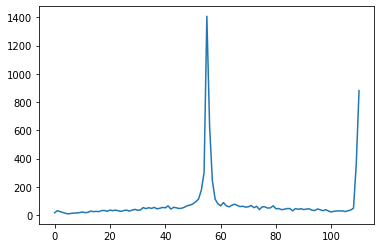

In [31]:
plt.plot(range(strand_len + 1), pos_counts)

In [32]:
def get_key(char1, char2):
    char1 = char1 if char1 != '' else '_'
    char2 = char2 if char2 != '' else '_'
    return char1 + ' -> ' + char2

strand_len = 110
pos_map = {}
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    key = get_key(sub[0], sub[1])
    if key not in pos_map:
        pos_map[key] = [0] * (strand_len + 1)
    pos_map[key][int(sub[2])] += count

print(pos_map['_ -> T'])

[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0, 3, 3, 7, 25, 31, 223, 55, 18, 3, 1, 0, 0, 0, 2, 1, 2, 1, 1, 0, 1, 1, 2, 0, 0, 2, 1, 0, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 2, 1, 0, 1, 2, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 38, 5]


In [33]:
sub_keys = [get_key(sub[0], sub[1]) for sub in subs_no_pos]
max_10_keys = sub_keys[-10:]
max_10_counts = counts_no_pos[-10:]


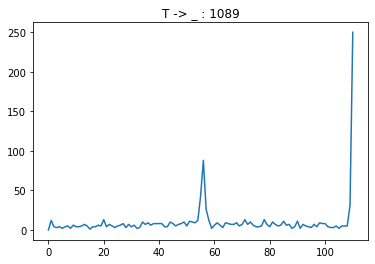

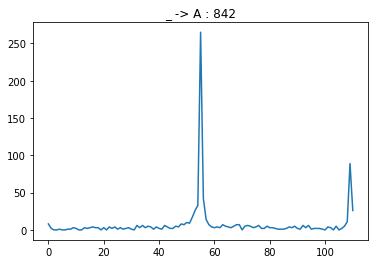

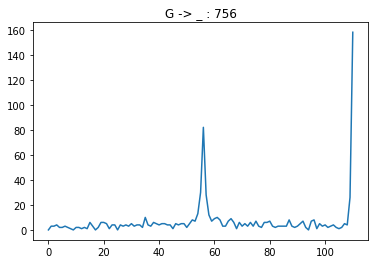

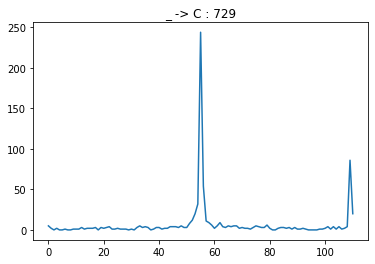

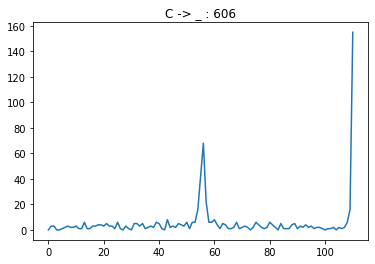

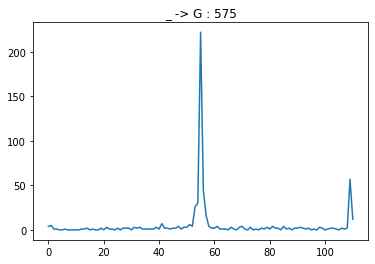

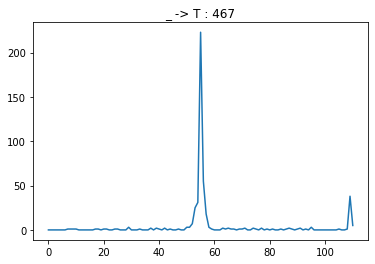

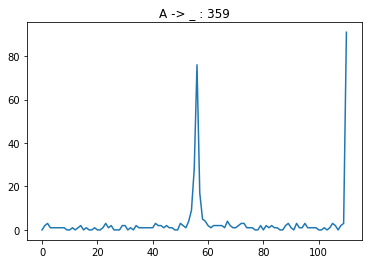

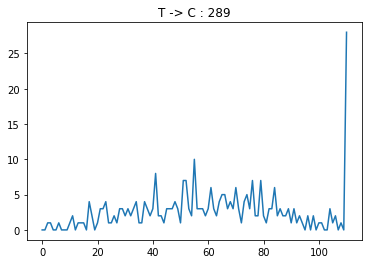

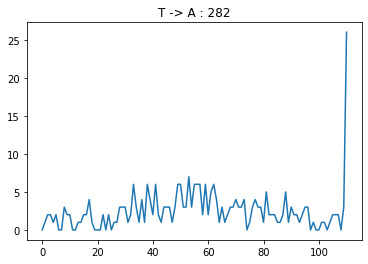

In [34]:
for key, count in zip(reversed(max_10_keys), reversed(max_10_counts)):
    plt.figure(key)
    plt.title(f'{key} : {count}')
    plt.plot(range(strand_len + 1), pos_map[key])

In [35]:
np.save('subs.npy', subs)
np.save('counts.npy', counts)